In [3]:
### fix how M values is taken in
### Switch to Jupyter Notebook
### Import Data
### Make a special data file with only 10 events or so
### Plot the raw signals from those 10 events
### Plot resulting Trapezoids
# figure out calibration
# Plot the full, calibrated energy spectra for Co, Cs, Am (to check for re-takes)
# Fit peaks and get FWHM Values
# Plot FWHM vs gap time
# Plot FWHM vs peak time
# Set optimal peak and gap times and save spectrum
# Make electronic noise plot
# calculate FANO factor
# Write text
# Write TEST functions
# BASELINE CORREXTION #np.mean(data['Rawdata']) np apply along axis 0 =comuln, 1 = row
# REDO DATA Cs = low stats, Co maybe okay, Am/ Co peaks?/ pulser?

#BASELINE CORREXTION #np.mean(data['Rawdata']) np apply along axis 0 = comuln, 1 = row, reshape?
#def fast_baseline_correction(data):


In [43]:
%run lab1_analysis_functions.py

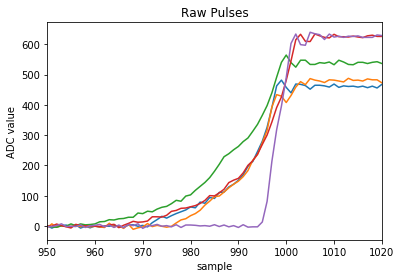

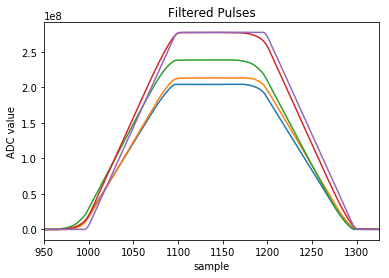

In [5]:
tenevents = read_ten_event_file()
ndata = len(tenevents)
nsamples = 4096
x_values = np.linspace(0, nsamples, nsamples)
tenevents = fast_baseline_correction(tenevents)
for event in tenevents[0:5]:
    plt.plot(event)
plt.xlim([950, 1020])
plt.title('Raw Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('tenevents_rawdata.pdf')
plt.show()

k = 100 
m = 100 
M = 4400

for event in tenevents[0:5]:
    event = fast_trapezoidal_filter(event, k, m, M=4400)
    plt.plot(x_values, event)
plt.xlim([950, 1325])
plt.title('Filtered Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('tenevents_filtered.pdf')
plt.show()

In [6]:
# filename = 'data/co60.h5'
filename = 'data/Cs_pulser_real.h5'
raw_data = import_data(filename)

In [87]:

#k_values = np.linspace(500, 10000, 2) # steps in 100 ns from 1ns to 10us
m_values = np.linspace(2000, 100000, 2) # steps in 100 ns from 1ns to 10us

number_of_events = len(raw_data)
ndata = number_of_events
assert number_of_events <= len(raw_data)

# tenevents = fast_baseline_correction(tenevents)
# for event in tenevents[0:5]:
# 
# for event in tenevents[0:5]:
#     event = fast_trapezoidal_filter(event, k, m, M=4400)

x_values = np.linspace(0, nsamples, nsamples)
baseline = np.mean(raw_data[0:number_of_events,0:99],1).reshape((number_of_events,1))
signals = raw_data[:number_of_events,] - baseline

M = find_M_value(signals[0:20])
#M = 4400
print(M)

k_values = [100]
m_values = np.linspace(0, 1000, 250)
m_values = [100]
fwhm_values_2 = []
m_values_ns_2 = []
k = k_values[0]
nrgs=[]
number_of_events = 10000
for m in m_values:
    m = int(m)
    print(m)
    m_values_ns_2.append(m * 10)
    ndata = len(raw_data)
    gap = 100
    peak = 100
    for i in range(0, number_of_events, 1):
        signal = raw_data[i,:]
        signal = baseline_correction(signal)
        #plt.figure(1)
        #plt.plot(signal)
        #maxval = max(signal)
        #signal = signal / maxval
        signal = fast_trapezoidal_filter(signal, gap, peak)
        #plt.figure(2)
        #plt.plot(signal)
        nrg = get_energy_value(signal)
        #print(nrg)
        #nrg = filter_and_get_energy(raw_data[i,:], gap, peak)
        nrgs.append(round(nrg, 7))
    #plt.show()
    #nrgs = np.apply_along_axis(fast_trapezoidal_filter, 1, signals, k, m, M)

5979.44525896
100


In [92]:
nbins = 2048
Cs_range = [0.01e9,0.5e9]
counts, bin_edges = np.histogram(nrgs, bins=2048, range= Cs_range) # WORKS
bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges    

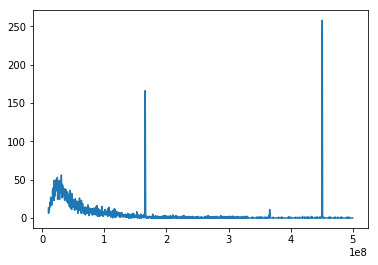

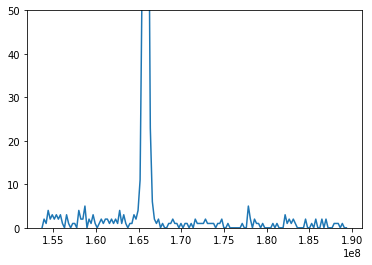

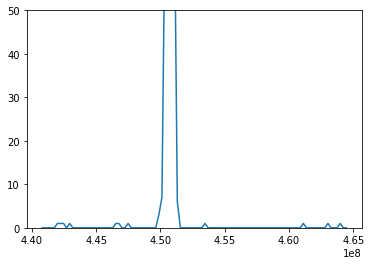

In [93]:
plt.plot(bins, counts)
plt.savefig('cs.pdf')
plt.show()
plt.plot(bins[600:750], counts[600:750])
plt.ylim([0,50])
plt.show()
plt.plot(bins[1800:1900], counts[1800:1900])
plt.ylim([0,50])
plt.show()

In [49]:
# filename = 'data/co60.h5'
filename = 'data/Co_pulser_real.h5'
raw_data = import_data(filename)

In [81]:

#k_values = np.linspace(500, 10000, 2) # steps in 100 ns from 1ns to 10us
m_values = np.linspace(2000, 100000, 2) # steps in 100 ns from 1ns to 10us

number_of_events = len(raw_data)
ndata = number_of_events
assert number_of_events <= len(raw_data)

x_values = np.linspace(0, nsamples, nsamples)
baseline = np.mean(raw_data[0:number_of_events,0:799],1).reshape((number_of_events,1))
signals = raw_data[:number_of_events,] - baseline

M = find_M_value(signals[0:20])
#M = 4400
print(M)

k_values = [100]
m_values = np.linspace(0, 1000, 250)
m_values = [1000]
fwhm_values_2 = []
m_values_ns_2 = []
k = k_values[0]
nrgs=[]
number_of_events = 10000
for m in m_values:
    m = int(m)
    print(m)
    m_values_ns_2.append(m * 10)
    ndata = len(raw_data)
    gap = 100
    peak = 100
    for i in range(0, number_of_events, 1):
        signal = raw_data[i,:]
        signal = baseline_correction(signal)
        #plt.figure(1)
        #plt.plot(signal)
        #maxval = max(signal)
        #signal = signal / maxval
        signal = fast_trapezoidal_filter(signal, gap, peak)
        #plt.figure(2)
        #plt.plot(signal)
        nrg = get_energy_value(signal)
        #print(nrg)
        #nrg = filter_and_get_energy(raw_data[i,:], gap, peak)
        nrgs.append(round(nrg, 7))
    #plt.show()
    #nrgs = np.apply_along_axis(fast_trapezoidal_filter, 1, signals, k, m, M)

5951.12053991
1000


In [82]:
nbins = 2048
counts, bin_edges = np.histogram(nrgs, bins=2048, range= Co_range) # WORKS
bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges    

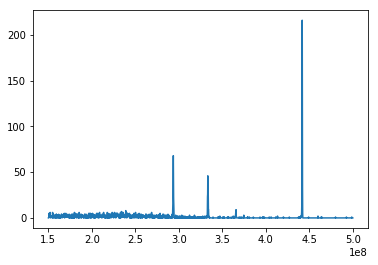

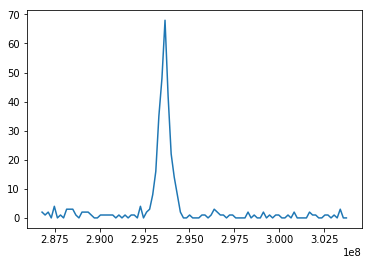

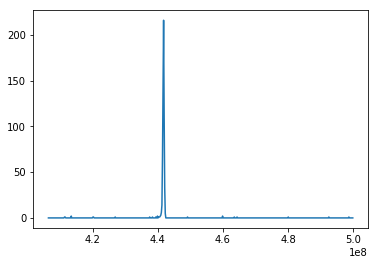

In [83]:
plt.plot(bins, counts)
plt.savefig('co.pdf')
plt.show()
plt.plot(bins[800:900], counts[800:900]) # 1173 peak around 850 if m = 0
plt.show()
plt.plot(bins[1500:4096], counts[1500:4096])
plt.show()

In [145]:
#k_values = np.linspace(500, 10000, 2) # steps in 100 ns from 1ns to 10us
m_values = np.linspace(2000, 100000, 2) # steps in 100 ns from 1ns to 10us

number_of_events = 3

#number_of_events = len(raw_data)
ndata = number_of_events
assert number_of_events <= len(raw_data)
raw_signals = raw_data[0:number_of_events,:]
# baseline = np.mean(raw_data[:number_of_events,0:99],1).reshape((number_of_events,1))
# baseline_corrected = raw_data[:number_of_events,] - baseline_vector
# nrgs = np.apply_along_axis(fast_trapezoidal_filter,1,raw_data[:number_of_events,],k, m, M)

#x_values = np.linspace(0, nsamples, nsamples)
#baseline = np.mean(raw_data[0:number_of_events,0:799],1).reshape((number_of_events,1))
#signals = raw_data[:number_of_events,] - baseline

def test_fast_baseline_correction():
    for i in range(0, 1, 1):
        signal = raw_signal[i,0:4096]
        signal = fast_baseline_correction(signal)
        plt.plot()
    plt.show()

In [135]:
filename = 'data/Cs_pulser_real.h5'
raw_data = import_data(filename)

('M ', 5930.7413273323618)
100


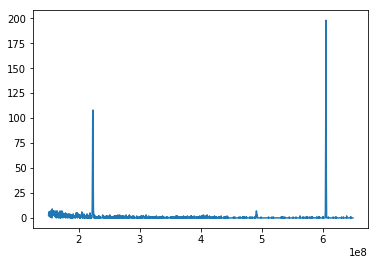

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 400
    # variables        = 3
    chi-square         = 1261.336
    reduced chi-square = 3.177
    Akaike info crit   = 465.385
    Bayesian info crit = 477.359
[[Variables]]
    sigma:       4.5341e+05 +/- 5.60e+03 (1.23%) (init= 488281.2)
    center:      2.2287e+08 +/- 5.60e+03 (0.00%) (init= 2.22876e+08)
    amplitude:   1.2788e+08 +/- 1.37e+06 (1.07%) (init= 1.582031e+08)
    fwhm:        1.0677e+06 +/- 1.32e+04 (1.23%)  == '2.3548200*sigma'
    height:      112.520555 +/- 1.203252 (1.07%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



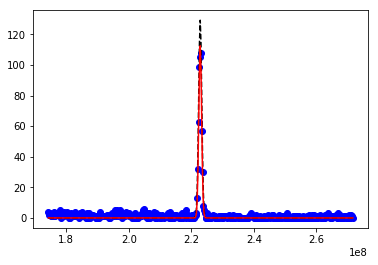

In [47]:
# OPTIMIZE GAP TIME
#tenevents = fast_baseline_correction(tenevents)
#    event = fast_trapezoidal_filter(event, k, m, M=4400)

# k_values = np.linspace(500, 10000, 2) # steps in 100 ns from 1ns to 10us
m_values = np.linspace(100, 200, 1) # steps in 100 ns from 1ns to 10us

Cs_range = [1.5e8,6.5e8]

number_of_events = len(raw_data)
ndata = 4096
number_of_events = 10000
assert number_of_events <= len(raw_data)

fwhm_values = []
m_values_ns = []
# m_values = [0, 10, 20]
k = 100

baseline = np.mean(raw_data[:number_of_events,0:99],1).reshape((number_of_events,1))
baseline_corrected_signals = raw_data[:number_of_events,] - baseline

M = find_M_value(baseline_corrected_signals[0:10])
print('M ', M)

for m in m_values:
    cs_nrgs=[]
    m = int(m)
    print(m)
    m_values_ns.append(m * 10)
    
    cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, baseline_corrected_signals , k, m, M)
        
    nbins = 2048
    cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048,range=Cs_range) #, range=Cs_range) # WORKS
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    plt.plot(bins, cs_counts)
    plt.show()
    fwhm, center = get_energy_resolution_cs_662(bins, cs_counts)
    fwhm_values.append(fwhm)


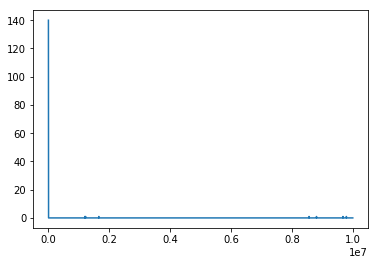

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 345
    # data points      = 1024
    # variables        = 3
    chi-square         = 3.000
    reduced chi-square = 0.003
    Akaike info crit   = -5966.847
    Bayesian info crit = -5952.053
[[Variables]]
    sigma:       2083.49579 +/- 1.86e+06 (89381.42%) (init= 832519.5)
    center:     -5272.65914 +/- 1.81e+07 (344046.94%) (init= 2441.406)
    amplitude:   6.9297e+08 +/- 1.44e+13 (2082129.01%) (init= 3.496582e+08)
    fwhm:        4906.25757 +/- 4.41e+06 (89822.83%)  == '2.3548200*sigma'
    height:      1.3269e+05 +/- 2.64e+09 (1992767.72%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(center, amplitude)         = -1.000 
    C(sigma, center)             = -1.000 
    C(sigma, amplitude)          =  1.000 



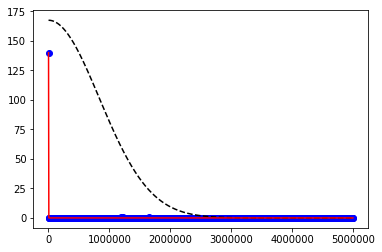

In [27]:
nbins = 2048
Cs_range = [0, 0.1e8]
cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=Cs_range) # WORKS
bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.plot(bins, cs_counts)
plt.show()
fwhm, center = get_energy_resolution_cs_662(bins, cs_counts)
fwhm_values.append(fwhm)

In [120]:
%run lab1_analysis_functions.py

In [115]:
fwhm_percent = []
for i in fwhm_values:
    fwhm_percent.append(round(i/661.7, 7)) 

[73027.271008, 75647.7678531, 72965.4213344, 73200.5110306, 72496.1031281, 72218.6414902, 71790.7458991, 71958.735897, 70617.0313855, 69936.5888827, 67920.7885645, 69093.9620948, 67233.995571, 67153.9427055, 66570.0793959, 67388.1477975, 67717.8967302, 66666.9779631, 67163.3744349, 67091.2765687]
[0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 530, 570, 610, 650, 690, 730, 770]


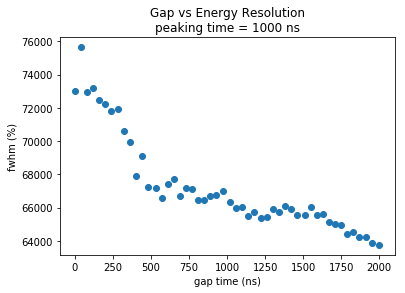

In [116]:
print(fwhm_percent[0:20])
print(m_values_ns[0:20])

plt.plot(m_values_ns, fwhm_percent, 'o')
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
plt.savefig('gap_optimization.png')
plt.title('Gap vs Energy Resolution' + '\n'  + 'peaking time = 1000 ns')
plt.show()

In [ ]:
plt.plot(m_values_ns_2[1:30], fwhm_percent_2[1:30], 'o')
print(m_values_ns_2[10:30])
print(fwhm_percent_2[10:30])
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
plt.savefig('gap_optimization.png')
plt.title('Gap vs Energy Resolution' + '\n'  + 'peaking time = 1000 ns')
plt.show()

plt.plot(m_values_ns_2, fwhm_percent_2, 'o')
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
#plt.savefig('gap_optimization.png')
plt.title('Gap vs Energy Resolution' + '\n'  + 'peaking time = 1000 ns')
plt.show()

print(min(fwhm_percent_2))
print(np.argmin(fwhm_percent_2))
print(fwhm_percent_2[np.argmin(fwhm_percent_2)])
print(m_values_ns_2[np.argmin(fwhm_percent_2)])

In [ ]:
#k_values = np.linspace(500, 10000, 2) # steps in 100 ns from 1ns to 10us
m_values = np.linspace(2000, 100000, 2) # steps in 100 ns from 1ns to 10us

k_values = [100]
m_values = np.linspace(0, 1000, 250) 
fwhm_values_2 = []
m_values_ns_2 = []
k = k_values[0]

x_values = np.linspace(0, nsamples, nsamples)
baseline = np.mean(raw_data[,0:99],1).reshape((ndata,1))
baseline_corrected_signals = raw_data - baseline

M = find_M_value(raw_data, 100)
print(M)

for m in m_values:
    m = int(m)
    m_values_ns_2.append(m * 10)
    #nrgs = []
    #ndata = len(raw_data)
    assert number_of_events <= len(raw_data)
    
    nrgs = np.apply_along_axis(fast_trapezoidal_filter, 1, baseline_corrected_signals , k, m, M)
   # print(nrgs)
   # for i in range(0, number_of_events, 1):
    #    signal = raw_data[i,:]
    #    nrg = filter_and_get_energy(signal, l, k, M)
    #    nrgs.append(round(nrg, 7))
        
    nbins = 2048
    co_counts, bin_edges = np.histogram(nrgs, bins=2048, range=[2.3e8, 2.8e8]) # WORKS
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    #co_energies = calibrate_co_spectrum(nrgs)
    #fwhm, center = get_energy_resolution_co_1173(co_energies, co_counts)
    fwhm, center = get_energy_resolution_co_1332(co_energies, co_counts)
    fwhm_values_2.append(fwhm)

# RUNTIME = 25 seconds per m loop
# RUNTIME using FAST functions = ?? per loop

In [ ]:
plt.plot(m_values_ns[0:100], fwhm_percent[0:100])
plt.plot(np.argmin(fwhm_percent) * 10, fwhm_percent[np.argmin(fwhm_percent)], 's')
plt.plot(m_values_ns[40], fwhm_percent[40], 's')
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
plt.savefig('gap_optimization_2.png')
plt.title('Gap vs Energy Resolution' + '\n'  + 'peaking time = 1000 ns')
plt.show()
print(min(fwhm_percent))
print(np.argmin(fwhm_percent))
print(fwhm_percent[np.argmin(fwhm_percent)])
print(m_values_ns[np.argmin(fwhm_percent)])

In [ ]:
plt.plot(m_values_ns, fwhm_percent, 'o')
print(m_values_ns[0:20])
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (keV)')
plt.savefig('gap_optimization.png')
plt.title('gap time vs energy resolution' + '\n'  + 'peaking time = 1000 ns')
plt.show()

4.55012607574
('M : ', 5922.0808199938656)
0.159641981125


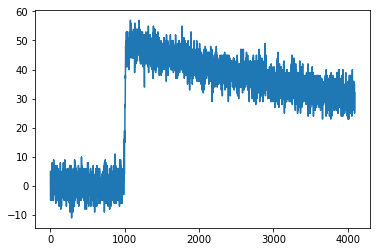

plot
0.360201120377
trap
0.00142192840576


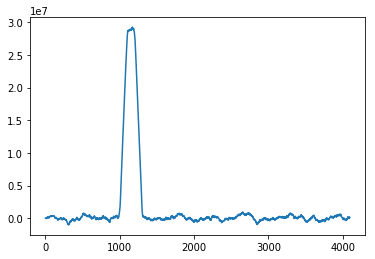

29240768.7243


In [6]:
start = time.time()
sampling_time = 10.0
number_of_events = len(raw_data)
n_data = 4096
x_values = np.linspace(0, nsamples, nsamples)
baseline = np.mean(raw_data[0:number_of_events,0:799],1).reshape((number_of_events,1))
signals = raw_data[:number_of_events,] - baseline

end1 = time.time()
print(end1 - start)

start = time.time()
M = find_M_value(signals[0:10])
print('M : ', M)
end1 = time.time()
print(end1 - start)

start = time.time()
signal = signals[0,:]
plt.plot(signal)
plt.show()
end1 = time.time()
print('plot')
print(end1 - start)

start = time.time()

peaking_time = 100 
gap = 100 
#M = 4400
filtered_signal = fast_trapezoidal_filter(signal, gap, peaking_time, M)

end1 = time.time()
print('trap')
print(end1 - start)
start = time.time()

plt.figure(41)
plt.cla()
plt.clf()
plt.plot(x_values, filtered_signal)
plt.show()
energy = get_energy_value(filtered_signal)
print(energy)

In [ ]:
plt.plot(m_values_ns, fwhm_values, 'o')
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (keV)')
plt.savefig('gap_optimization.png')
plt.title('gap time vs energy resolution' + '\n'  + 'peaking time = 500 ns')
plt.show()

In [ ]:
plt.plot(bins, co_counts)
plt.show()
plt.plot(bins[200:400], co_counts[200:400])
plt.show()
plt.plot(bins[400:], co_counts[400:])
plt.show()

In [ ]:
plt.plot(m_values, index, 'o')
plt.show()

In [ ]:
plt.plot(m_values_ns, fwhm_values, 'o')
plt.show()

In [ ]:
plt.plot(m_values_ns, fwhm_values, 'o')
plt.xlabel('gap time (ns)')
plt.title('variable gap with peaking time = 1')
plt.show()

In [ ]:
# END HERE STOP 

In [ ]:
#k_values = np.linspace(500, 10000, 2) # steps in 100 ns from 1ns to 10us
m_values = np.linspace(0, 100000, 10) # steps in 100 ns from 1ns to 10us

M = 4400

k = 100
#m_values = np.linspace(1, 10000, 10)

fwhm_values = []
m_values_ns = []
index = []
for m in m_values:
    print(m)
    m_values_ns.append(m * 10)
    nrgs = []
    number_of_events = len(raw_data)
    assert number_of_events <= len(raw_data)

    for i in range(0, number_of_events, 1):
        signal = raw_data[i,:]
        nrg = filter_and_get_energy(signal, l, k, M)
        nrgs.append(round(nrg, 7))
        
    nbins = 2048
    co_counts, bin_edges = np.histogram(nrgs, bins=2048, range=[2.3e8, 2.9e8]) # WORKS
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    index.append(np.argmax(co_counts))
   # co_energies = calibrate_co_spectrum(nrgs)
    #fwhm, center = get_energy_resolution_co_1173(co_energies, co_counts)
  #  fwhm, center = get_energy_resolution_co_1332(co_energies, co_counts)
        
  #  fwhm_values.append(fwhm)
        

In [ ]:

if __name__ == "__main__":

    filename = './DATA_co60_2.h5'
    hf = tables.open_file(filename, "r")

    event_data = hf.root.EventData.read()
    raw_data = hf.root.RawData.read()
    hf.close()

    sampling_time = 10.0
    n_data = 4096
    x_values = np.linspace(0, n_data, n_data)
    print("XVAL" , len(x_values))

    k = 100 # peaking
    m = 100 # gap
    raw_signal = raw_data[2,:]
    print("RAW ", len(raw_signal))
    plt.plot(x_values, raw_signal)
    signal = baseline_correction(raw_signal)
    signal = trapezoidal_filter_2(signal, m, k)

    plt.figure(41)
    plt.cla()
    plt.clf()
    plt.plot(x_values, signal)
    plt.title('sample sig')
    plt.show()

    energy = get_energy_value(signal)
    print(energy)

    nrgs_2 = []
    number_of_events = len(raw_data)
    number_of_events = 1
    assert number_of_events < len(raw_data)
    k = 100 # peaking time
    l = 100 # gap

    for i in range(0, number_of_events, 1):
        gap = 100
        peak = 100
        signal = raw_data[i,:]
        signal = baseline_correction(signal)
        maxval = max(signal)
        signal = signal / maxval
        signal = trapezoidal_filter_2(signal, gap, peak)
        signal = signal / 424829.69
        print('gain = ', max(signal))
        nrg = get_energy_value(signal)
        #nrg = filter_and_get_energy(raw_data[i,:], gap, peak)
        nrgs_2.append(round(nrg, 7))



    plt.hist(nrgs_2, 500, log=True)
    plt.show()

In [ ]:
# filename = 'data/co60.h5'
start = time.time()
filename = 'data/DATA_co60_2.h5'
raw_data = import_data(filename)

end1 = time.time()
print('import')
print(end1 - start)

start = time.time()
sampling_time = 10.0
n_data = 4096
x_values = np.linspace(0, n_data, n_data)
#M = find_M_value(raw_data, 10)
M = 4400

end1 = time.time()
print('M')
print(end1 - start)

start = time.time()
print(M)
#M = 4400
raw_signal = raw_data[2,:]
signal = baseline_correction(raw_signal)

end1 = time.time()
print('baseline')
print(end1 - start)
start = time.time()

plt.plot(signal)
plt.show()

end1 = time.time()
print('plot')
print(end1 - start)
start = time.time()

peaking_time = 100 
gap = 100 
#M = 4400
filtered_signal = fast_trapezoidal_filter(signal, gap, peaking_time, M)

end1 = time.time()
print('trap')
print(end1 - start)
start = time.time()

plt.figure(41)
plt.cla()
plt.clf()
plt.plot(x_values, filtered_signal)
plt.show()
energy = get_energy_value(filtered_signal)
print(energy)

In [ ]:
nrgs = []
number_of_events = len(raw_data)
assert number_of_events <= len(raw_data)

#M = find_M_value(raw_data, 10)
M = 4400
k = 100 # peaking time
l = 100 # gap

for i in range(0, number_of_events, 1):
    signal = raw_data[i,:]
    nrg = fast_trapezoidal_filter_energy(signal, l, k, M)
    nrgs.append(round(nrg, 7))

In [ ]:
nbins = 2048
counts, bin_edges = np.histogram(nrgs, bins=2048, range=[1.75e8, 2.9e8]) #range=[2.3e8, 2.9e8] WORKS
bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.figure()
plt.plot(bins, counts)
plt.title('Co-60 Spectrum')
plt.ylabel('counts')
plt.xlabel('channel')
plt.savefig('./co60.pdf')
plt.show()

nbins = 2048
counts, bin_edges = np.histogram(nrgs, bins=2048, range=[2.3e8, 2.9e8]) # WORKS
bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.figure()
plt.plot(bins, counts)
plt.title('Co-60 Spectrum')
plt.ylabel('counts')
plt.xlabel('channel')
plt.savefig('./co60.pdf')
plt.show()


In [ ]:
co_energies = calibrate_co_spectrum(nrgs)


In [ ]:
plt.plot(co_energies, counts)
plt.show()

In [ ]:
energy_values = []
fwhm_values = []

fwhm, center = get_energy_resolution_co_1332(co_energies, counts)
fwhm_values.append(fwhm)
energy_values.append(center)

plt.plot(energy_values, fwhm_values, 'o')
plt.show()